# Line Integrals in Scalar Fields


In this section, we shall explore the concept of a line integral. We will stick to the study of three dimensional functions as they are easy to visualize, but the discussion can be extended to higher dimensions

Consider a real valued three dimensional function $ z = f(x, y) $. In this case, we will take the function $ z = x^2 - y^2 $ from -10 to 10, but you can take any.

<IPython.core.display.Javascript object>


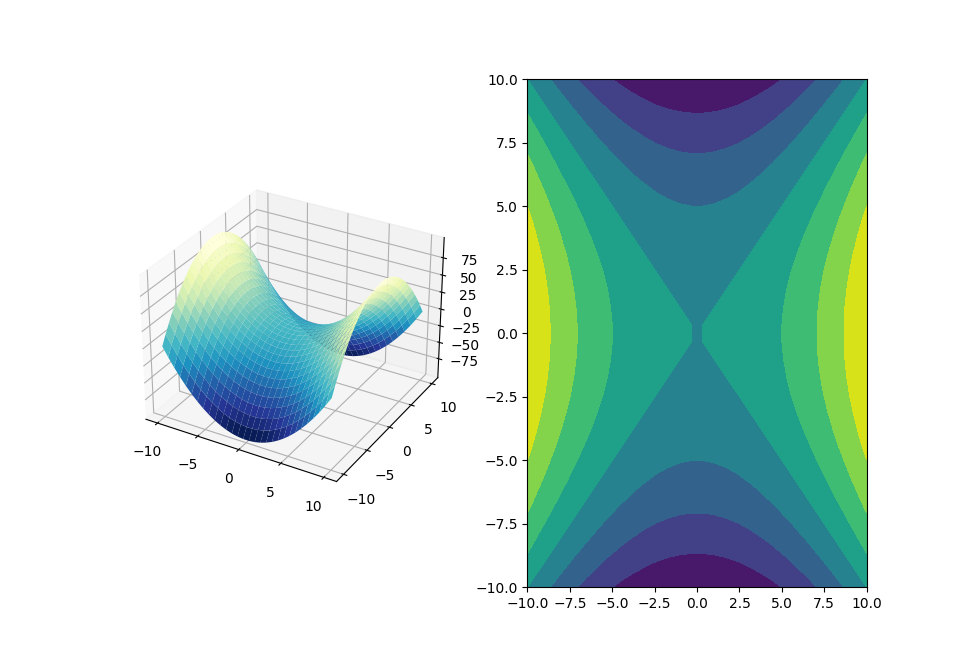

In [22]:
# Necessary Library Imports
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d

# Our function
def f(x,y):
    return (x**2 - y**2)

# Create figure and its associated handler
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
contour = fig.add_subplot(1, 2, 2)

# Create a square mesh from (-5,-5) -> (5,5) to set up our function
xline = np.linspace(-10, 10, 30)
yline = np.linspace(-10, 10, 30)
X, Y = np.meshgrid(xline, yline)
# Execute!
Z = f(X,Y)
# Plot the Surface
ax.plot_surface(X, Y, Z, cmap=cm.YlGnBu_r, linewidth=0, antialiased=True)
contour.contourf(X, Y, Z)

Now, we consider a two dimensional path $C$, which lies in the input dimensions of the function. In this case, let us say that $C$ is a circle centered at $(0,0)$ with a radius 4.

<IPython.core.display.Javascript object>


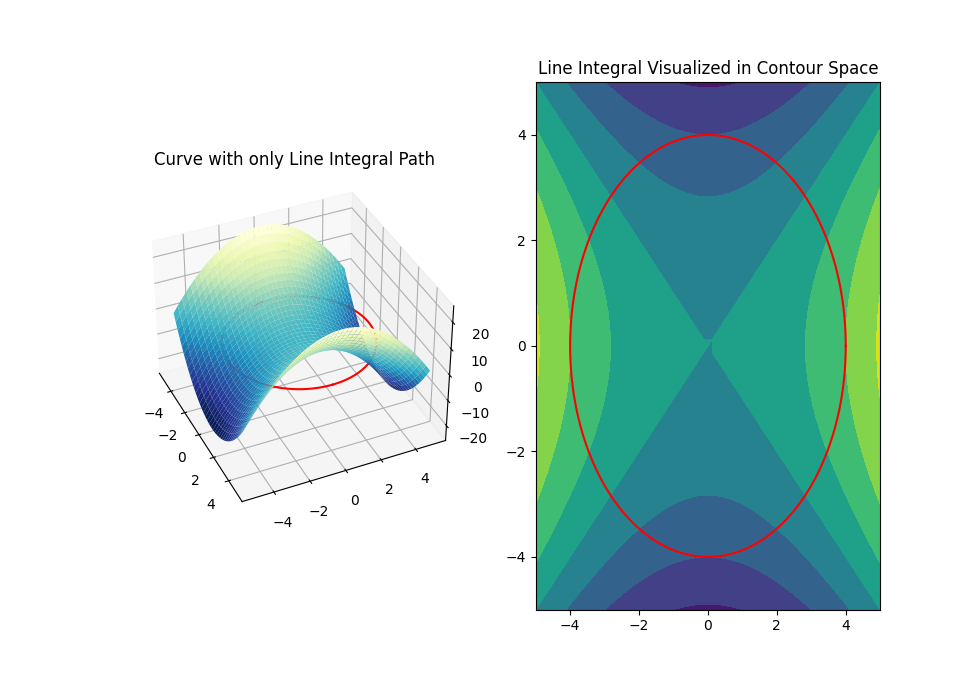

In [23]:
# Necessary Library Imports
%matplotlib notebook
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d

# Our function
def f(x,y):
    return x**2 - y**2

# Create figure and its associated handler
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')

# Create a square mesh from (-5,-5) -> (5,5) to set up our function
xline = np.linspace(-5, 5, 40)
yline = np.linspace(-5, 5, 40)
X, Y = np.meshgrid(xline, yline)
# Execute!
Z = f(X,Y)
# Plot the Surface
ax.plot_surface(X, Y, Z, cmap=cm.YlGnBu_r, linewidth=0, antialiased=True)

# Path C
r = 4
t = np.linspace(0, 2*math.pi, 360)
x_c = r * np.cos(t)
y_c = r * np.sin(t)
z_c = np.full((len(t)), 0)
ax.plot3D(x_c, y_c, z_c, 'red')

ax.set_title("Curve with only Line Integral Path")

ax2 = fig.add_subplot(1, 2, 2)
ax2.contourf(X, Y, Z)
ax2.plot(x_c, y_c, color='red')
ax2.set_title("Line Integral Visualized in Contour Space")
fig.show()

Let us now consider, that we were to find the surface area enclosed by the curve and the surface. That is, we take every point on the path $C$, and raise it to the function $f(x,y)$. The result would be a surface along that curve. 

If $C$ is of the form $x(t), y(t)$ then the 3-dimensional curve that will result from the "raising" of $C$ to $f(x,y)$ will be given by: $f(x(t),y(t))$, such a curve has been plotted below:

<IPython.core.display.Javascript object>


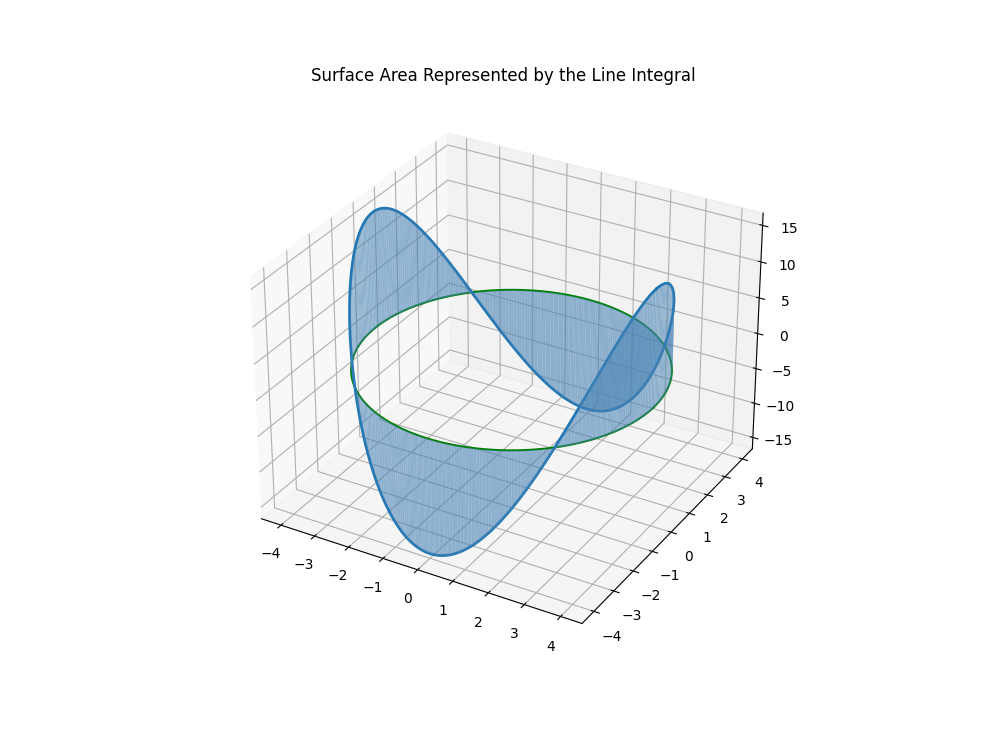

<Axes3DSubplot: title={'center': 'Surface Area Represented by the Line Integral'}>

In [24]:
# Necessary Library Imports
%matplotlib notebook
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
from fillbetween3d import fill_between_3d
# Our function
def f(x,y):
    return x**2 - y**2

# Create figure and its associated handler
fig = plt.figure()
ax = plt.axes(projection='3d')

# Path C
r = 4
t = np.linspace(0, 2*math.pi, 360)
x_c = r * np.cos(t)
y_c = r * np.sin(t)
z_c = np.zeros(shape=(len(t)))
ax.plot3D(x_c, y_c, z_c, 'green')

# Draw Line Integral Surface
z_l = f(x_c,y_c)
ax.plot3D(x_c, y_c, z_l,linewidth=2)
ax.set_title("Surface Area Represented by the Line Integral")
fill_between_3d(ax,x_c,y_c,[0 for _ in t], x_c,y_c,z_l)
ax

The question now remains, what is the area of the surface above? This can be computed using line integrals.

We take a rectangle element of width $ds$ along the curve at a point represented by $x(t), y(t)$ as shown below:

![Line Integral Steps](line-integrals.png)

We can thus formulate that the area of the surface, A, will be:

$$ A = \sum_{i=0}^{N} f(x(t_i),y(t_i) \Delta s $$

If we increase $N$ to $\infty$, we will get the area of the surface that is filled between the path $C$ and the function $f(x,y)$, we thus say:

$$ \int_{C}{f(x,y) ds} = \lim_{n \rightarrow \infty}{\sum_{i=0}^{N} f(x(t_i),y(t_i) \Delta s} $$

Note that $ds$ can be written as:

$$ ds = \sqrt{(x(t + dt) - x(t))^2 + (y(t + dt) - y(t))^2} $$

Dividing and multiplying by $dt$ we get:

$$ ds = dt \sqrt{(\frac{x(t + dt) - x(t)}{dt})^2 + (\frac{y(t + dt) - y(t)}{dt})^2} $$
$$ ds = dt \sqrt{(\frac{dx}{dt})^2 + (\frac{dy}{dt})^2} $$

We thus have:

$$ \int_{C}{f(x,y) ds} = \int_{t=a}^{t=b}{f(x(t),y(t))}{\sqrt{(\frac{dx}{dt})^2 + (\frac{dy}{dt})^2} dt} $$

## Problem 1

Calculate the line integral of the curve $z = x^2 - y$ along the circle centered at origin with radius 4.

__Solution__: We first parameterize the circle,

$$ x = 4 cos(t) $$
$$ y = 4 sin(t) $$

$$ 0 \leq t \leq 2\pi$$

Next, we substitute our paramterization into the function:

$$ f(x,y)_C = 4 cos^2(t) - 4sin(t) $$

We also find $ds$,

$$ \frac{dx}{dt} = -4sin(t) $$
$$ \frac{dy}{dt} = 4cos(t) $$

$$ ds = \sqrt{16 sin^2(t) + 16 cos^2 (t)} dt $$
$$ ds = 4 dt $$

And now we integrate along that path, the whole circle means that the parameter $t$ must go from $0$ to $2\pi$:

$$ \int_{C}{f(x,y)ds} =  \int_{t=0}^{t=2\pi}{(4cos^2 (t) - 4 sin(t)) 4 dt} $$

This definite integral can be numerically computed.

In [3]:
import math
import numpy as np

def integrating_function(t):
    return 16 * math.cos(t) * math.cos(t) - 16 * math.sin(t)

# Calculate the single variable integral
integral = 0
dt = 0.0001

for i in np.arange(0, 2 * math.pi, dt):
    integral += integrating_function(i) * dt

print("The integral of 16 cos^2(t) - 16 sin(t) from 0 to 2 pi is: " + str(integral))

The integral of 16 cos^2(t) - 16 sin(t) from 0 to 2 pi is: 50.26571755259064


## Line Integrals over 3D Paths

In the previous section we dealt with a 2D curve, but what if our path itself exists in 3 dimensions? Let us take an example of the helix curve, represented by the parametric equations:

$$ x = cos(t), y = sin(t), z = t $$

<IPython.core.display.Javascript object>


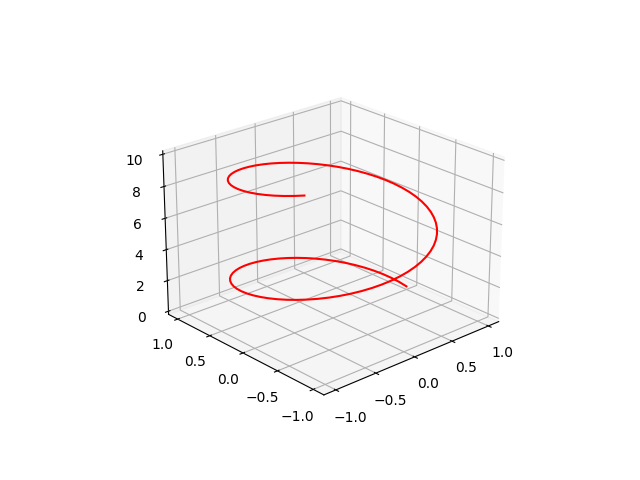

In [20]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from fillbetween3d import fill_between_3d

fig = plt.figure()
ax = plt.axes(projection='3d')

t = np.linspace(0, 10, 100)
x = np.cos(t)
y = np.sin(t)
z = t

ax.plot3D(x, y, z, color='red')

What would a line integral along a function $f$, meaning $\int_{C}{f(x(t),y(t),z(t)) ds}$ even mean? Now, it is difficult to visualize this function, as its input space is 3 dimensional making the curve 4 dimensional.

We can still calculate it by drawing an analogue with the previous line integral.

$$ \int_{C}{f(x,y,z) ds} = \int_{t=a}^{t=b}{f(x(t),y(t),z(t))\sqrt{x'(t)^2 + y'(t)^2 + z'(t)^2}} dt $$ 

## What does the line integral along a 3-Dimensional Line Represent?

Consider a density field $\delta (t)$ that describes the density per unit length along the parameter _t_ in 3 dimensional space. The 3-dimensional line integral of of this $\delta (t)$ along the path $x(t), y(t), z(t)$ from $t = a$ to $t = b$ will represent the mass of the wire.

$$ M_{wire} = \int_{t=a}^{t=b}{\delta(t)\sqrt{x'(t)^2 + y'(t)^2 + z'(t)^2}} dt $$ 

# Line Integrals in Vector Fields

Let us consider a vector field $\vec{F}(x,y)$. Recall, that $\vec{F}: R^2 \rightarrow R^2$. Now, let us say we have a path in this space called the curve $C$, parameterized as $r(t)$. An example scenario is shown below:


<IPython.core.display.Javascript object>


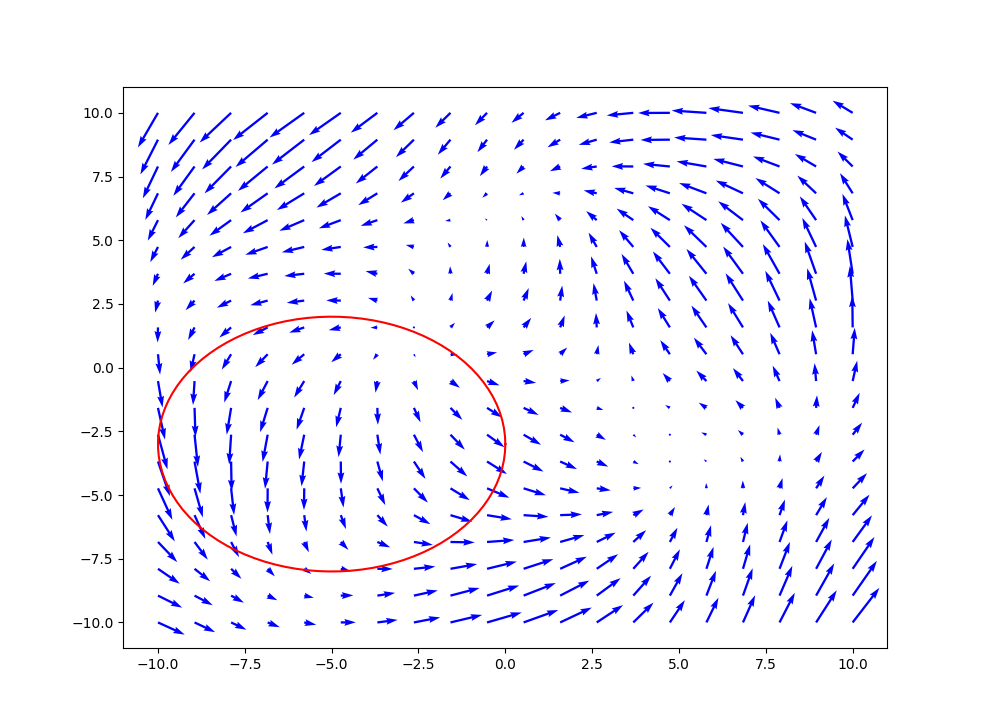

<AxesSubplot: >

In [34]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import random

# Make the vector field
X_V, Y_V = np.meshgrid(np.linspace(-10, 10, 20), np.linspace(-10, 10, 20))
U, V = (-Y_V + 5*np.cos(X_V/2), X_V + 5*np.sin(Y_V/2))

# Make the path
t = np.linspace(0, 2*np.pi, 100)
X_C, Y_C = (-5 + 5*np.cos(t), -3 + 5*np.sin(t))

fig = plt.figure()
ax = plt.axes()
ax.plot(X_C, Y_C, color='r')
ax.quiver(X_V, Y_V, U, V, color='b')
ax


<center><b>Figure</b>: Vector field represented by $(-y + 5\cos{\frac{x}{2}})\hat{i} + (x + 5 \sin{\frac{y}{2}})\hat{j}$ and the path $C$ which is represented by $(-5 + 5 \cos{t}, -3 + 5\sin{t})$</center>

---

## Work

Imagine that the vector field $\vec{F}$ as shown above is a force field, with each vector at $(x,y)$ describing the force experienced if an object was kept on $(x,y)$. The question we ask is: What is the work done by the field if an object were to move counterclockwise on our path?

The answer will be dependent upon how much of the curve is _tangential_ to the path. If the force field is completely _normal_ to our path, then the work done across the whole path will be zero. If the field is _tangential_ to the path, then the work done will be maximum. This is because: recall from earlier classes that we define work $W$, as $W = \vec{F} \cdot \vec{s}$.